# ML assignment 3
## Problem 1

In [1]:
import pandas as pd
df = pd.read_csv('Concrete_Data.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# rename columns
df.rename(columns=lambda x: x.split('(')[0], inplace=True)

In [3]:
df.assign().head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.describe(percentiles=[])

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.input=df.iloc[:,0:-1]
df.input.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [6]:
df.output=df.iloc[:,-1]
df.output.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete compressive strength, dtype: float64

In [7]:
# Show columns containing missing values
print("Columns containing missing value:", 
      df.columns[df.isna().any()].tolist())

Columns containing missing value: []


### Visualiaztion for 9 attributes

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

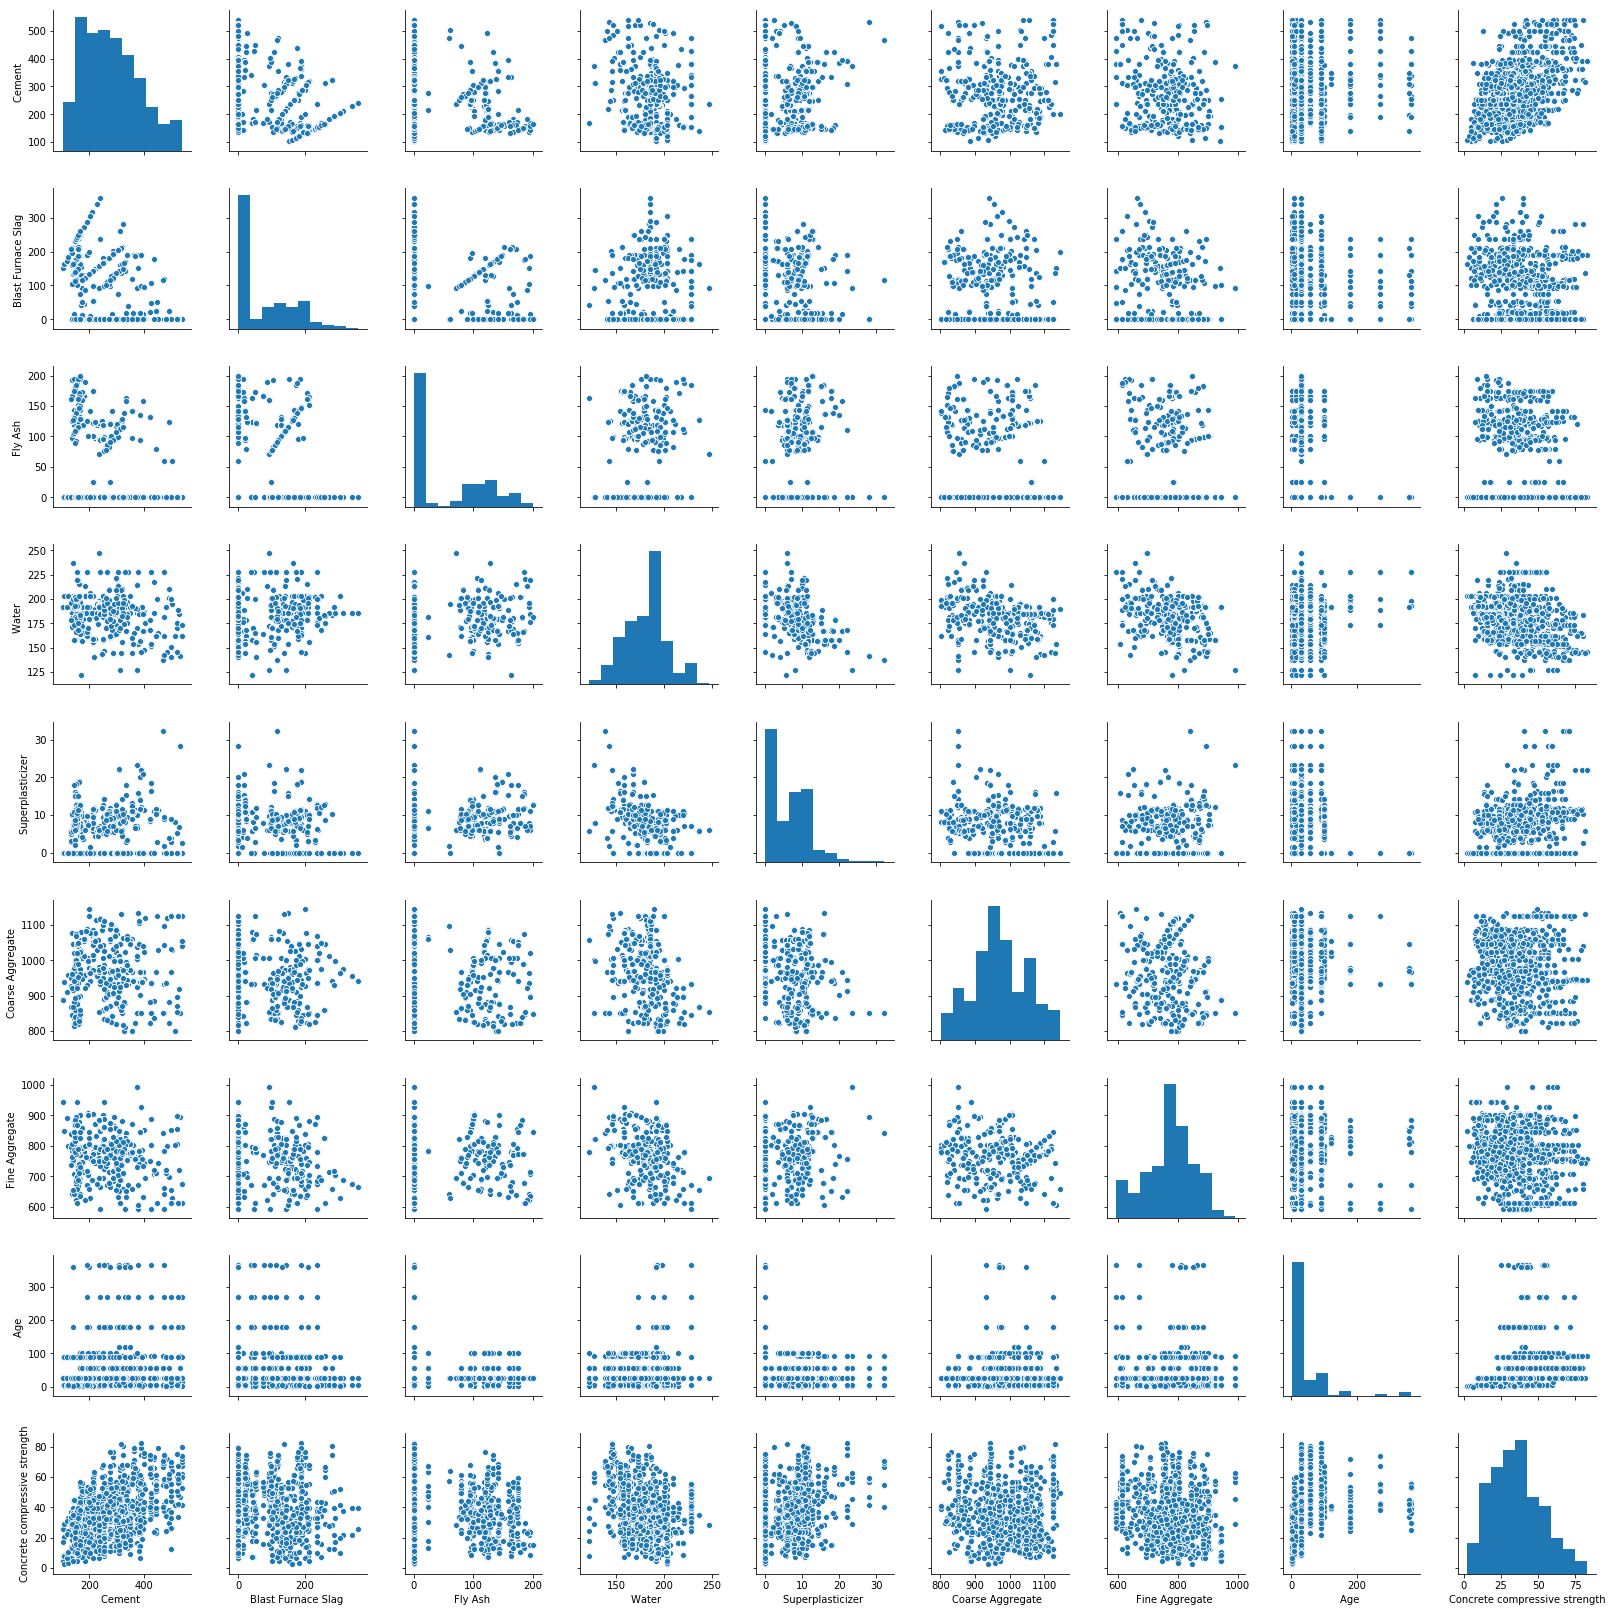

In [9]:
#g1 = sns.pairplot(df)
#g1.savefig("pairplot.png")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


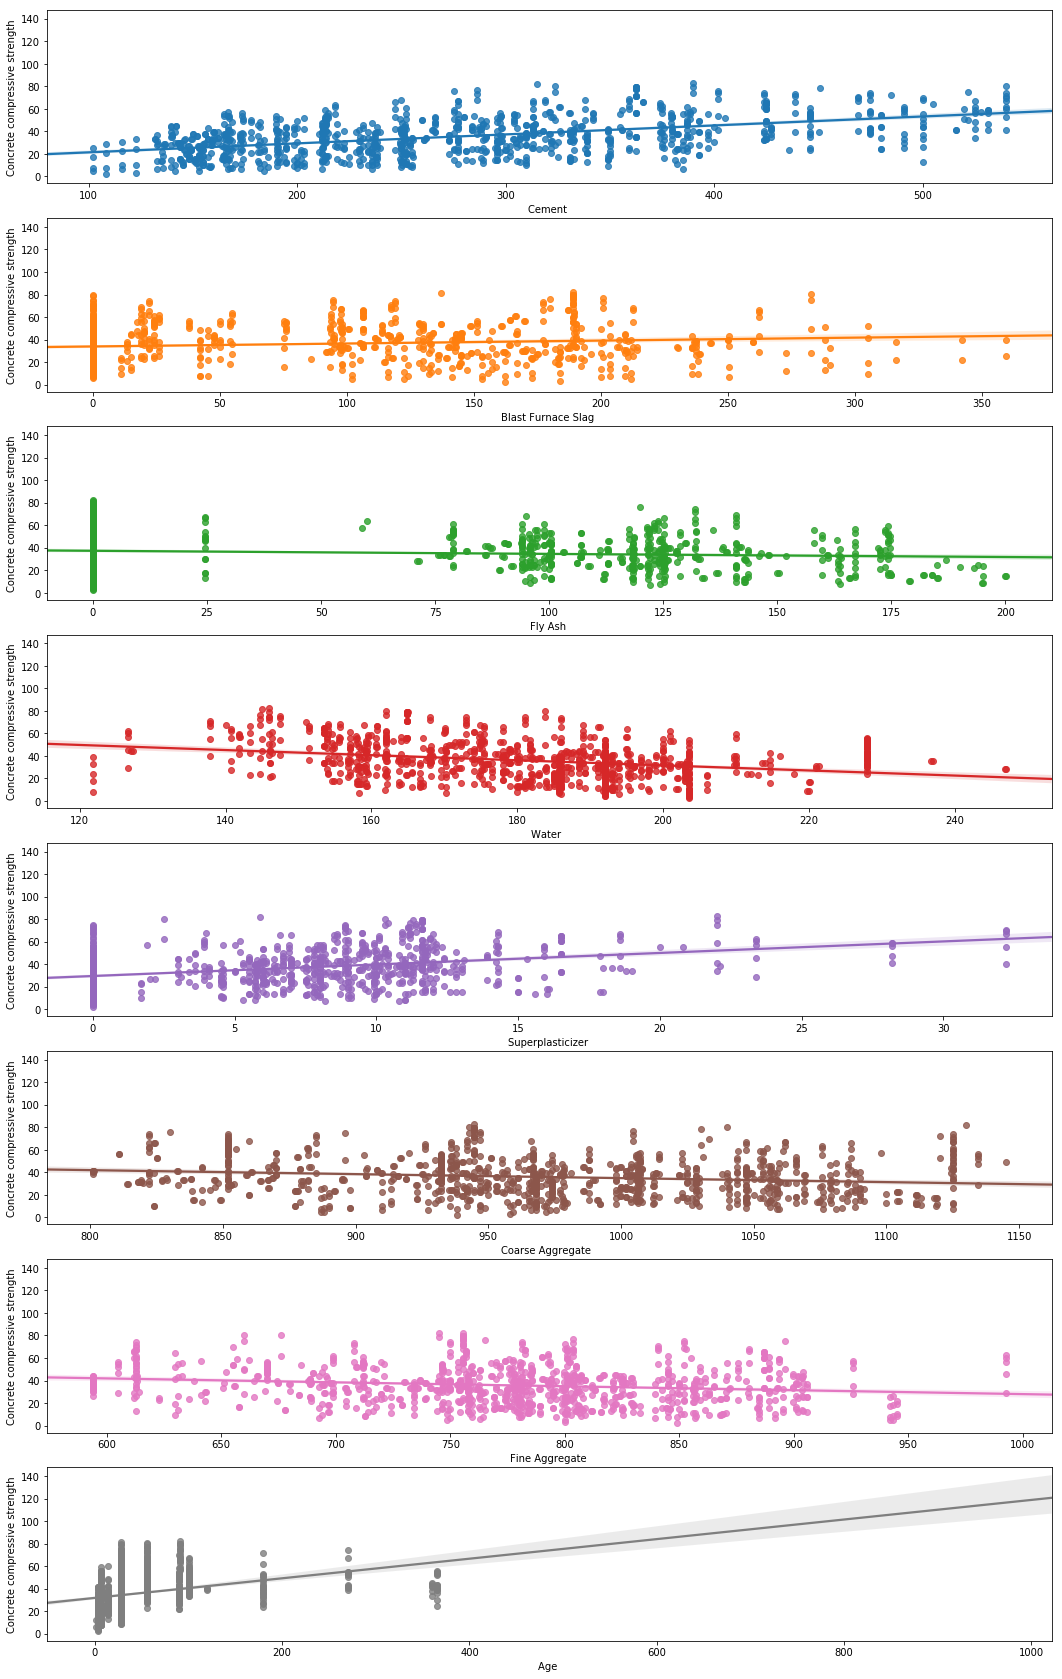

In [10]:
# Create a figure instance, and the two subplots
inputNum = 8

axes = []
fig, axes = plt.subplots(nrows=inputNum, sharey=True, figsize=(18, 30))

for i in range(0, inputNum):
    sns.regplot(x=df.columns[i], y=df.columns[inputNum], data=df, ax=axes[i])

plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


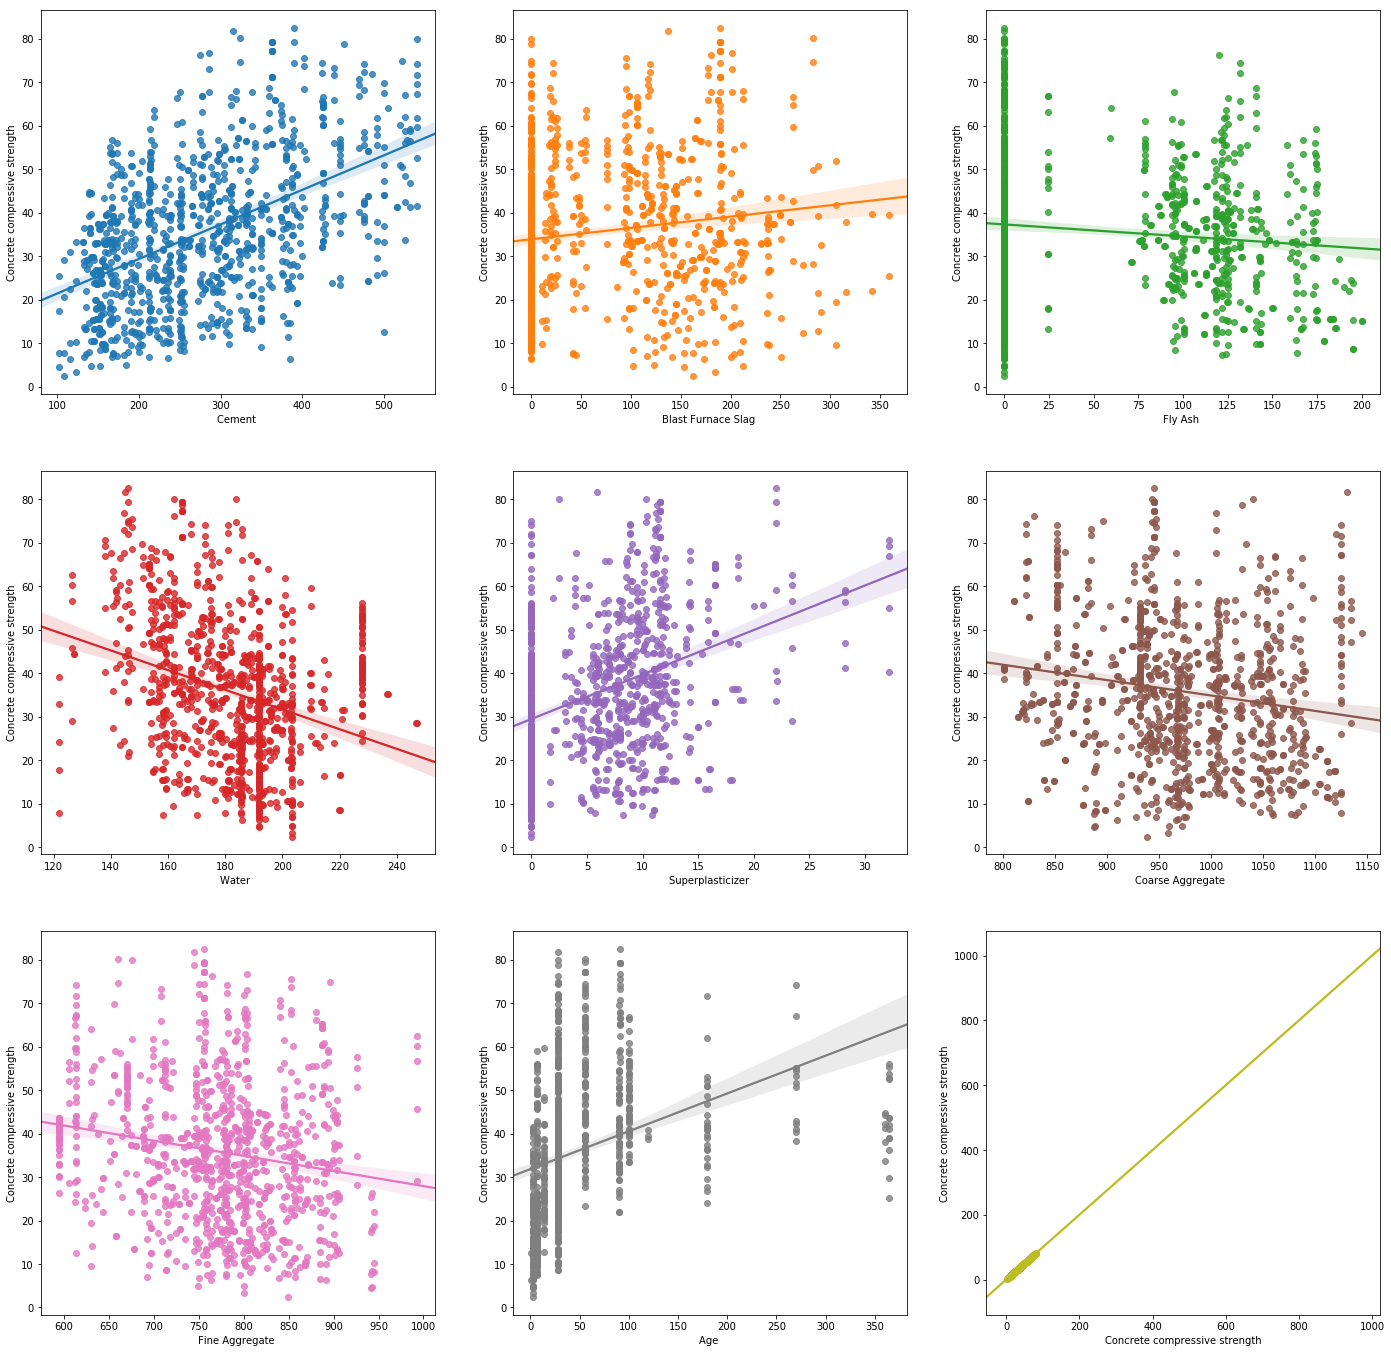

In [11]:
# Create a figure instance, and the two subplots
inputNum = 8

axes = []
fig, axes = plt.subplots(3, 3, figsize=(24, 24))

for i in range(0, 3):
    for j in range(0, 3):
        sns.regplot(x=df.columns[i*3+j], y=df.columns[inputNum], data=df, ax=axes[i][j])

plt.show()

## Data Selection & Data Partition

In [12]:
X, y = df.iloc[:, 0], df.iloc[:, -1]

# X = X.values.reshape(-1, 1)
# y = y.values.reshape(-1, 1)

from sklearn.metrics import mean_squared_error
row = ['lm1', 'lm2', 'lm3', 'lm4', 'lm5', 'lm6', 'lm7', 'lm8', 'lm9']
col = ['MSE', 'Cor(R2-score)', 'bias', 'weight']
regResult = pd.DataFrame(index=row, columns=col)

In [13]:
from sklearn.model_selection import train_test_split
trainCol = ['X_train', 'y_train']
testCol = ['X_test', 'y_test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
Train = pd.DataFrame(columns=trainCol)
Train.iloc[:, 0]=X_train.values
Train.iloc[:, 1]=y_train.values

Test = pd.DataFrame(columns=testCol)
Test.iloc[:, 0]=X_test.values
Test.iloc[:, 1]=y_test.values

In [15]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

## Simple linear regression

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


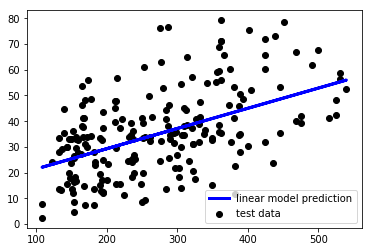

In [16]:
# simple linear regression by sklearn function
from sklearn.linear_model import LinearRegression

# Train linear model by training set
reg1 = LinearRegression().fit(X_train, y_train)
y_pred_lm = reg1.predict(X_test)
Test['y_pred_lm'] = y_pred_lm
# The coefficients
#print('Coefficients (weight): ', reg1.coef_)
#print('Intercept (bias): ', reg1.intercept_)
#print('linear model Correlation (R2-score): \n', reg1.score(X_train, y_train))


# Plot outputs
plt.scatter(X_test, y_test,  color='black', label='test data')
plt.plot(X_test, y_pred_lm, color='blue', linewidth=3, label='linear model prediction')

regResult.iloc[0, 0] = mean_squared_error(y_test, y_pred_lm)
regResult.iloc[0, 1] = reg1.score(X_train, y_train)
regResult.iloc[0, 2] = reg1.intercept_[0]
regResult.iloc[0, 3] = reg1.coef_[0]
regResult.assign()

plt.legend()
plt.show()


In [17]:
Test.head()

,X_test,y_test,y_pred_lm
0,300.0,26.85,37.135796
1,149.0,23.52,25.255637
2,212.0,47.82,30.212259
3,307.0,34.49,37.686532
4,380.0,41.15,43.429920


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


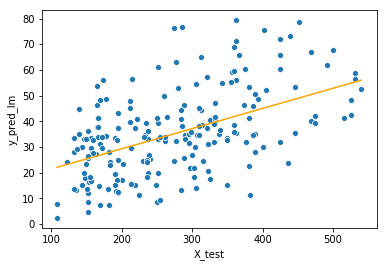

In [24]:
# cf. testing data(blue) & predicted data(orange)
#sns.regplot(x=X_test.reshape(1,-1)[0], y=y_test.reshape(1,-1)[0])
sns.scatterplot(x='X_test', y='y_test', data=Test)
sns.lineplot(x='X_test', y='y_pred_lm', data=Test, color='orange')



In [25]:
regResult

,MSE,Cor(R2-score),bias,weight
lm1,199.101,0.241546,13.5328,[0.07867655145590376]
lm2,NaN,NaN,NaN,NaN
lm3,NaN,NaN,NaN,NaN
lm4,NaN,NaN,NaN,NaN
lm5,NaN,NaN,NaN,NaN
lm6,NaN,NaN,NaN,NaN
lm7,NaN,NaN,NaN,NaN
lm8,NaN,NaN,NaN,NaN
lm9,NaN,NaN,NaN,NaN


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: F

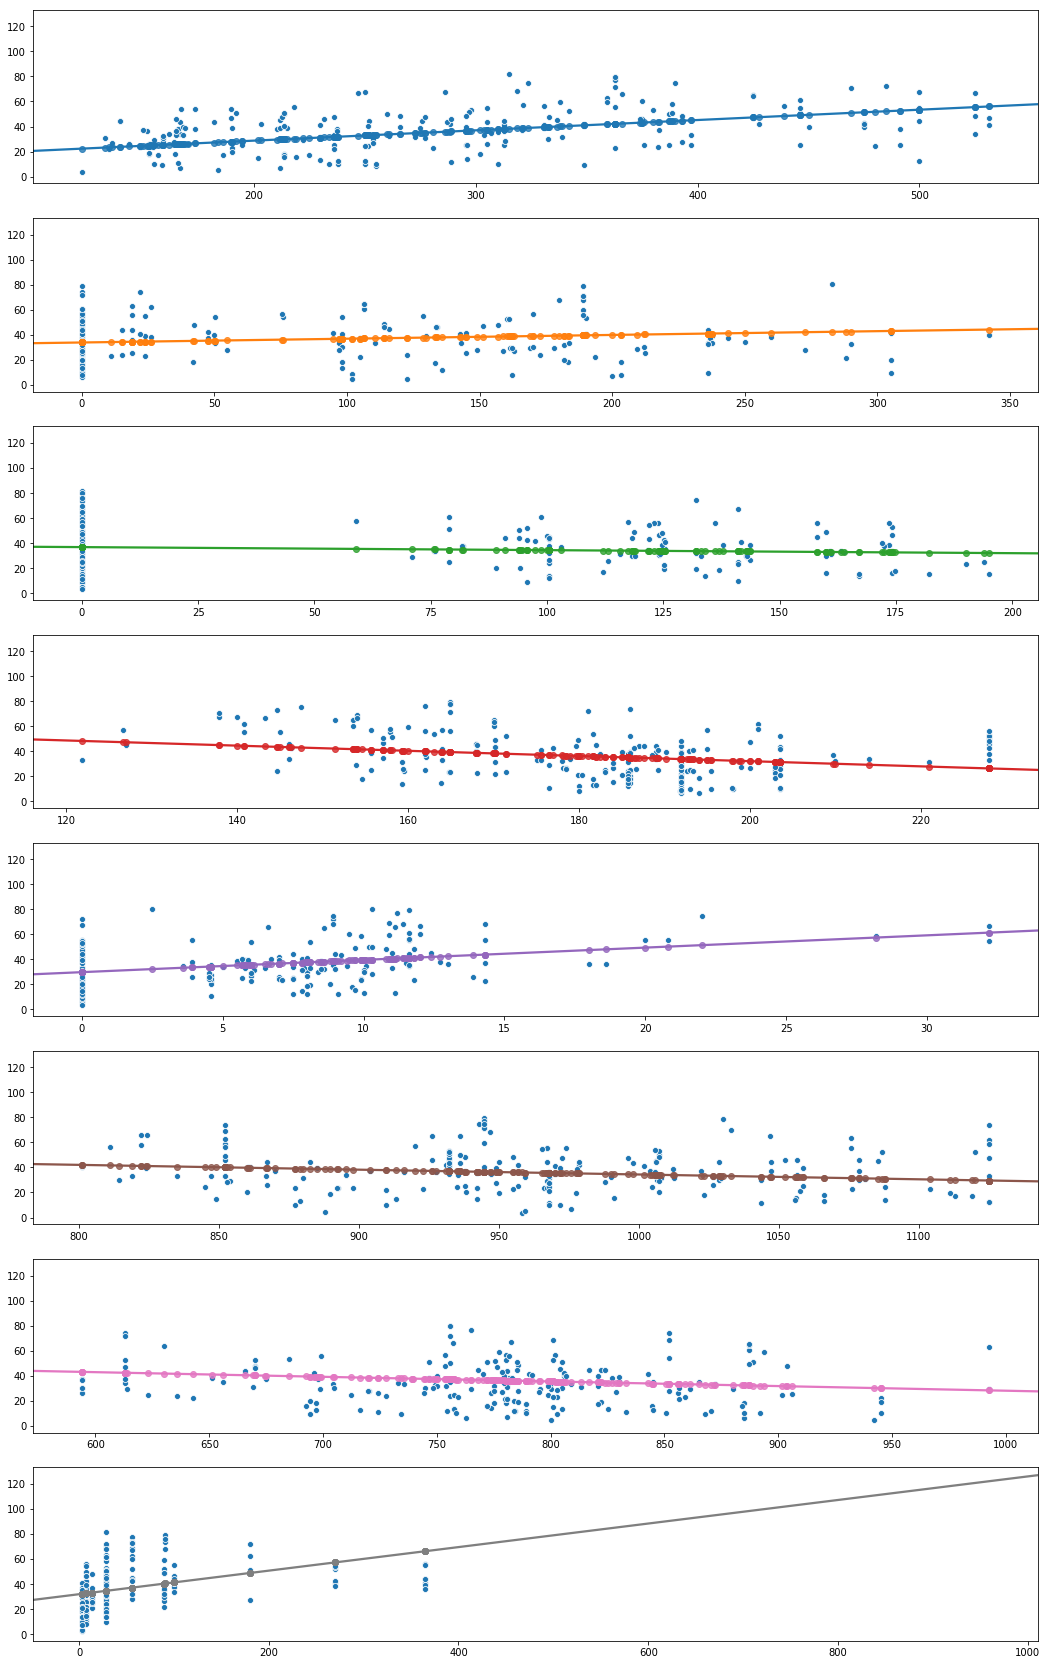

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

inputNum = 8

axes = []
fig, axes = plt.subplots(nrows=inputNum, sharey=True, figsize=(18, 30))

for i in range(0, inputNum):
    #sns.regplot(x=df.columns[i], y=df.columns[inputNum], data=df, ax=axes[i])


    X, y = df.iloc[:, i], df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    df2 = pd.concat([X_train, X_test, y_train, y_test], axis=1)

    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)



    # simple linear regression by sklearn function

    # Train linear model by training set
    reg1 = LinearRegression().fit(X_train, y_train)
    y_pred_lm = reg1.predict(X_test)

    # The coefficients
    #print('Coefficients (weight): ', reg1.coef_)
    #print('Intercept (bias): ', reg1.intercept_)
    #print('linear model Correlation (R2-score): \n', reg1.score(X_train, y_train))


    # Plot outputs
    #sns.regplot(x=df.columns[i], y=df.columns[inputNum], data=df, ax=axes[i])
    sns.scatterplot(x=X_test.reshape(1,-1)[0], y=y_test.reshape(1,-1)[0], ax=axes[i])
    sns.regplot(x=X_test.reshape(1,-1)[0], y=y_pred_lm.reshape(1,-1)[0], ax=axes[i])


    #plt.plot(X_test, y_pred_lm, color='blue', linewidth=3)

    regResult.iloc[i, 0] = mean_squared_error(y_test, y_pred_lm)
    regResult.iloc[i, 1] = reg1.score(X_train, y_train)
    regResult.iloc[i, 2] = reg1.intercept_[0]
    regResult.iloc[i, 3] = reg1.coef_[0]
    regResult.assign()

    #plt.legend()
    #plt.show()


In [27]:
regResult.assign()

,MSE,Cor(R2-score),bias,weight
lm1,251.728,0.270851,12.2207,[0.08242425825208609]
lm2,275.437,0.0232537,33.7808,[0.03016559951049368]
lm3,284.652,0.00846163,36.6275,[-0.024224433427749086]
lm4,283.119,0.0732772,73.2945,[-0.20679656449930542]
lm5,246.751,0.124535,29.6983,[0.9807113860719165]
lm6,283.95,0.0319496,72.8338,[-0.0384568660694186]
lm7,280.77,0.0318086,65.0043,[-0.03705032815507828]
lm8,278.528,0.110908,31.7052,[0.09409939742870786]
lm9,NaN,NaN,NaN,NaN
